In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s4e3/sample_submission.csv
/kaggle/input/playground-series-s4e3/train.csv
/kaggle/input/playground-series-s4e3/test.csv


# **Import**

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# **1. Data Import & Structure**

In [4]:
train = pd.read_csv('/kaggle/input/playground-series-s4e3/train.csv')
test = pd.read_csv('/kaggle/input/playground-series-s4e3/test.csv')
original = pd.read_csv('/kaggle/input/playground-series-s4e3/sample_submission.csv')

In [5]:
train.dtypes

id                         int64
X_Minimum                  int64
X_Maximum                  int64
Y_Minimum                  int64
Y_Maximum                  int64
Pixels_Areas               int64
X_Perimeter                int64
Y_Perimeter                int64
Sum_of_Luminosity          int64
Minimum_of_Luminosity      int64
Maximum_of_Luminosity      int64
Length_of_Conveyer         int64
TypeOfSteel_A300           int64
TypeOfSteel_A400           int64
Steel_Plate_Thickness      int64
Edges_Index              float64
Empty_Index              float64
Square_Index             float64
Outside_X_Index          float64
Edges_X_Index            float64
Edges_Y_Index            float64
Outside_Global_Index     float64
LogOfAreas               float64
Log_X_Index              float64
Log_Y_Index              float64
Orientation_Index        float64
Luminosity_Index         float64
SigmoidOfAreas           float64
Pastry                     int64
Z_Scratch                  int64
K_Scatch  

In [6]:
train.isna().sum()

id                       0
X_Minimum                0
X_Maximum                0
Y_Minimum                0
Y_Maximum                0
Pixels_Areas             0
X_Perimeter              0
Y_Perimeter              0
Sum_of_Luminosity        0
Minimum_of_Luminosity    0
Maximum_of_Luminosity    0
Length_of_Conveyer       0
TypeOfSteel_A300         0
TypeOfSteel_A400         0
Steel_Plate_Thickness    0
Edges_Index              0
Empty_Index              0
Square_Index             0
Outside_X_Index          0
Edges_X_Index            0
Edges_Y_Index            0
Outside_Global_Index     0
LogOfAreas               0
Log_X_Index              0
Log_Y_Index              0
Orientation_Index        0
Luminosity_Index         0
SigmoidOfAreas           0
Pastry                   0
Z_Scratch                0
K_Scatch                 0
Stains                   0
Dirtiness                0
Bumps                    0
Other_Faults             0
dtype: int64

In [7]:
train.describe()

,id,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
count,19219.000000,19219.000000,19219.000000,1.921900e+04,1.921900e+04,19219.000000,19219.000000,19219.000000,1.921900e+04,19219.000000,...,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000
mean,9609.000000,709.854675,753.857641,1.849756e+06,1.846605e+06,1683.987616,95.654665,64.124096,1.918467e+05,84.808419,...,0.102742,-0.138382,0.571902,0.076279,0.059837,0.178573,0.029554,0.025235,0.247828,0.341225
std,5548.191747,531.544189,499.836603,1.903554e+06,1.896295e+06,3730.319865,177.821382,101.054178,4.420247e+05,28.800344,...,0.487681,0.120344,0.332219,0.265450,0.237190,0.383005,0.169358,0.156844,0.431762,0.474133
min,0.000000,0.000000,4.000000,6.712000e+03,6.724000e+03,6.000000,2.000000,1.000000,2.500000e+02,0.000000,...,-0.988400,-0.885000,0.119000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4804.500000,49.000000,214.000000,6.574680e+05,6.575020e+05,89.000000,15.000000,14.000000,9.848000e+03,70.000000,...,-0.272700,-0.192500,0.253200,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9609.000000,777.000000,796.000000,1.398169e+06,1.398179e+06,168.000000,25.000000,23.000000,1.823800e+04,90.000000,...,0.111100,-0.142600,0.472900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,14413.500000,1152.000000,1165.000000,2.368032e+06,2.362511e+06,653.000000,64.000000,61.000000,6.797800e+04,105.000000,...,0.529400,-0.084000,0.999400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,19218.000000,1705.000000,1713.000000,1.298766e+07,1.298769e+07,152655.000000,7553.000000,903.000000,1.159141e+07,196.000000,...,0.991700,0.642100,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
train.head()

,id,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,0,584,590,909972,909977,16,8,5,2274,113,...,-0.5000,-0.0104,0.1417,0,0,0,1,0,0,0
1,1,808,816,728350,728372,433,20,54,44478,70,...,0.7419,-0.2997,0.9491,0,0,0,0,0,0,1
2,2,39,192,2212076,2212144,11388,705,420,1311391,29,...,-0.0105,-0.0944,1.0000,0,0,1,0,0,0,0
3,3,781,789,3353146,3353173,210,16,29,3202,114,...,0.6667,-0.0402,0.4025,0,0,1,0,0,0,0
4,4,1540,1560,618457,618502,521,72,67,48231,82,...,0.9158,-0.2455,0.9998,0,0,0,0,0,0,1


In [9]:
test.isna().sum()

id                       0
X_Minimum                0
X_Maximum                0
Y_Minimum                0
Y_Maximum                0
Pixels_Areas             0
X_Perimeter              0
Y_Perimeter              0
Sum_of_Luminosity        0
Minimum_of_Luminosity    0
Maximum_of_Luminosity    0
Length_of_Conveyer       0
TypeOfSteel_A300         0
TypeOfSteel_A400         0
Steel_Plate_Thickness    0
Edges_Index              0
Empty_Index              0
Square_Index             0
Outside_X_Index          0
Edges_X_Index            0
Edges_Y_Index            0
Outside_Global_Index     0
LogOfAreas               0
Log_X_Index              0
Log_Y_Index              0
Orientation_Index        0
Luminosity_Index         0
SigmoidOfAreas           0
dtype: int64

In [10]:
test.isna().sum()

id                       0
X_Minimum                0
X_Maximum                0
Y_Minimum                0
Y_Maximum                0
Pixels_Areas             0
X_Perimeter              0
Y_Perimeter              0
Sum_of_Luminosity        0
Minimum_of_Luminosity    0
Maximum_of_Luminosity    0
Length_of_Conveyer       0
TypeOfSteel_A300         0
TypeOfSteel_A400         0
Steel_Plate_Thickness    0
Edges_Index              0
Empty_Index              0
Square_Index             0
Outside_X_Index          0
Edges_X_Index            0
Edges_Y_Index            0
Outside_Global_Index     0
LogOfAreas               0
Log_X_Index              0
Log_Y_Index              0
Orientation_Index        0
Luminosity_Index         0
SigmoidOfAreas           0
dtype: int64

In [11]:
original.isna().sum()

id              0
Pastry          0
Z_Scratch       0
K_Scatch        0
Stains          0
Dirtiness       0
Bumps           0
Other_Faults    0
dtype: int64

In [12]:
original.head()

,id,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,19219,0.5,0.5,0.5,0.5,0.5,0.5,0.5
1,19220,0.5,0.5,0.5,0.5,0.5,0.5,0.5
2,19221,0.5,0.5,0.5,0.5,0.5,0.5,0.5
3,19222,0.5,0.5,0.5,0.5,0.5,0.5,0.5
4,19223,0.5,0.5,0.5,0.5,0.5,0.5,0.5


--------------

# **2. Data Transform**

In [13]:
target = ["Pastry","Z_Scratch","K_Scatch","Stains","Dirtiness","Bumps","Other_Faults"]
numeric_cols = ['X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum', 'Pixels_Areas', 'X_Perimeter', 'Y_Perimeter',
                'Sum_of_Luminosity', 'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer', 'Steel_Plate_Thickness', 
                'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index', 'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 
                'LogOfAreas', 'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index', 'SigmoidOfAreas']

In [14]:
target_data = train[target]
target_data['id'] = train['id']

In [16]:
target_data['label'] = target_data[target].apply(lambda x: '_'.join(x.index[x==1].tolist()), axis=1)

In [17]:
target_data['label'] = target_data['label'].replace('', 'None')

In [18]:
train['label'] = target_data['label']

In [19]:
target_data.head()

,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults,id,label
0,0,0,0,1,0,0,0,0,Stains
1,0,0,0,0,0,0,1,1,Other_Faults
2,0,0,1,0,0,0,0,2,K_Scatch
3,0,0,1,0,0,0,0,3,K_Scatch
4,0,0,0,0,0,0,1,4,Other_Faults


In [20]:
train.head()

,id,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,...,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults,label
0,0,584,590,909972,909977,16,8,5,2274,113,...,-0.0104,0.1417,0,0,0,1,0,0,0,Stains
1,1,808,816,728350,728372,433,20,54,44478,70,...,-0.2997,0.9491,0,0,0,0,0,0,1,Other_Faults
2,2,39,192,2212076,2212144,11388,705,420,1311391,29,...,-0.0944,1.0000,0,0,1,0,0,0,0,K_Scatch
3,3,781,789,3353146,3353173,210,16,29,3202,114,...,-0.0402,0.4025,0,0,1,0,0,0,0,K_Scatch
4,4,1540,1560,618457,618502,521,72,67,48231,82,...,-0.2455,0.9998,0,0,0,0,0,0,1,Other_Faults


In [21]:
target_data['label'].value_counts()

label
Other_Faults             6540
Bumps                    4761
K_Scatch                 3411
Pastry                   1465
Z_Scratch                1150
None                      818
Stains                    568
Dirtiness                 485
K_Scatch_Other_Faults      18
K_Scatch_Bumps              2
Pastry_K_Scatch             1
Name: count, dtype: int64

----------

# **3. Data Visualization**

**Histogram of numeric variables**

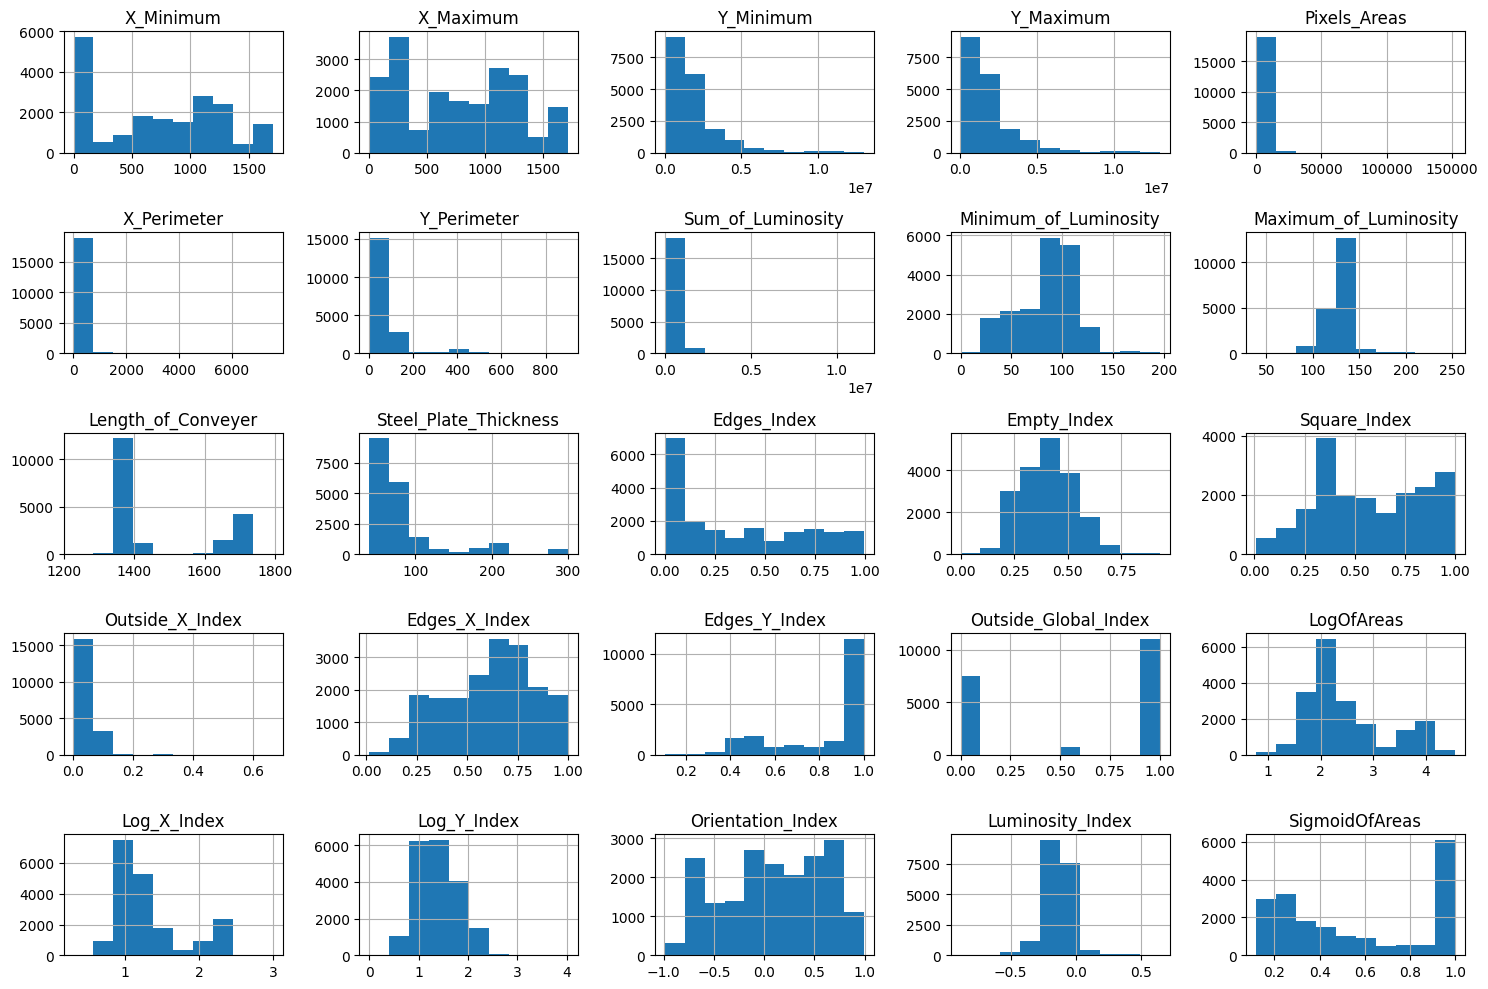

In [22]:
train[numeric_cols].hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

**Number variable boxplot by label**

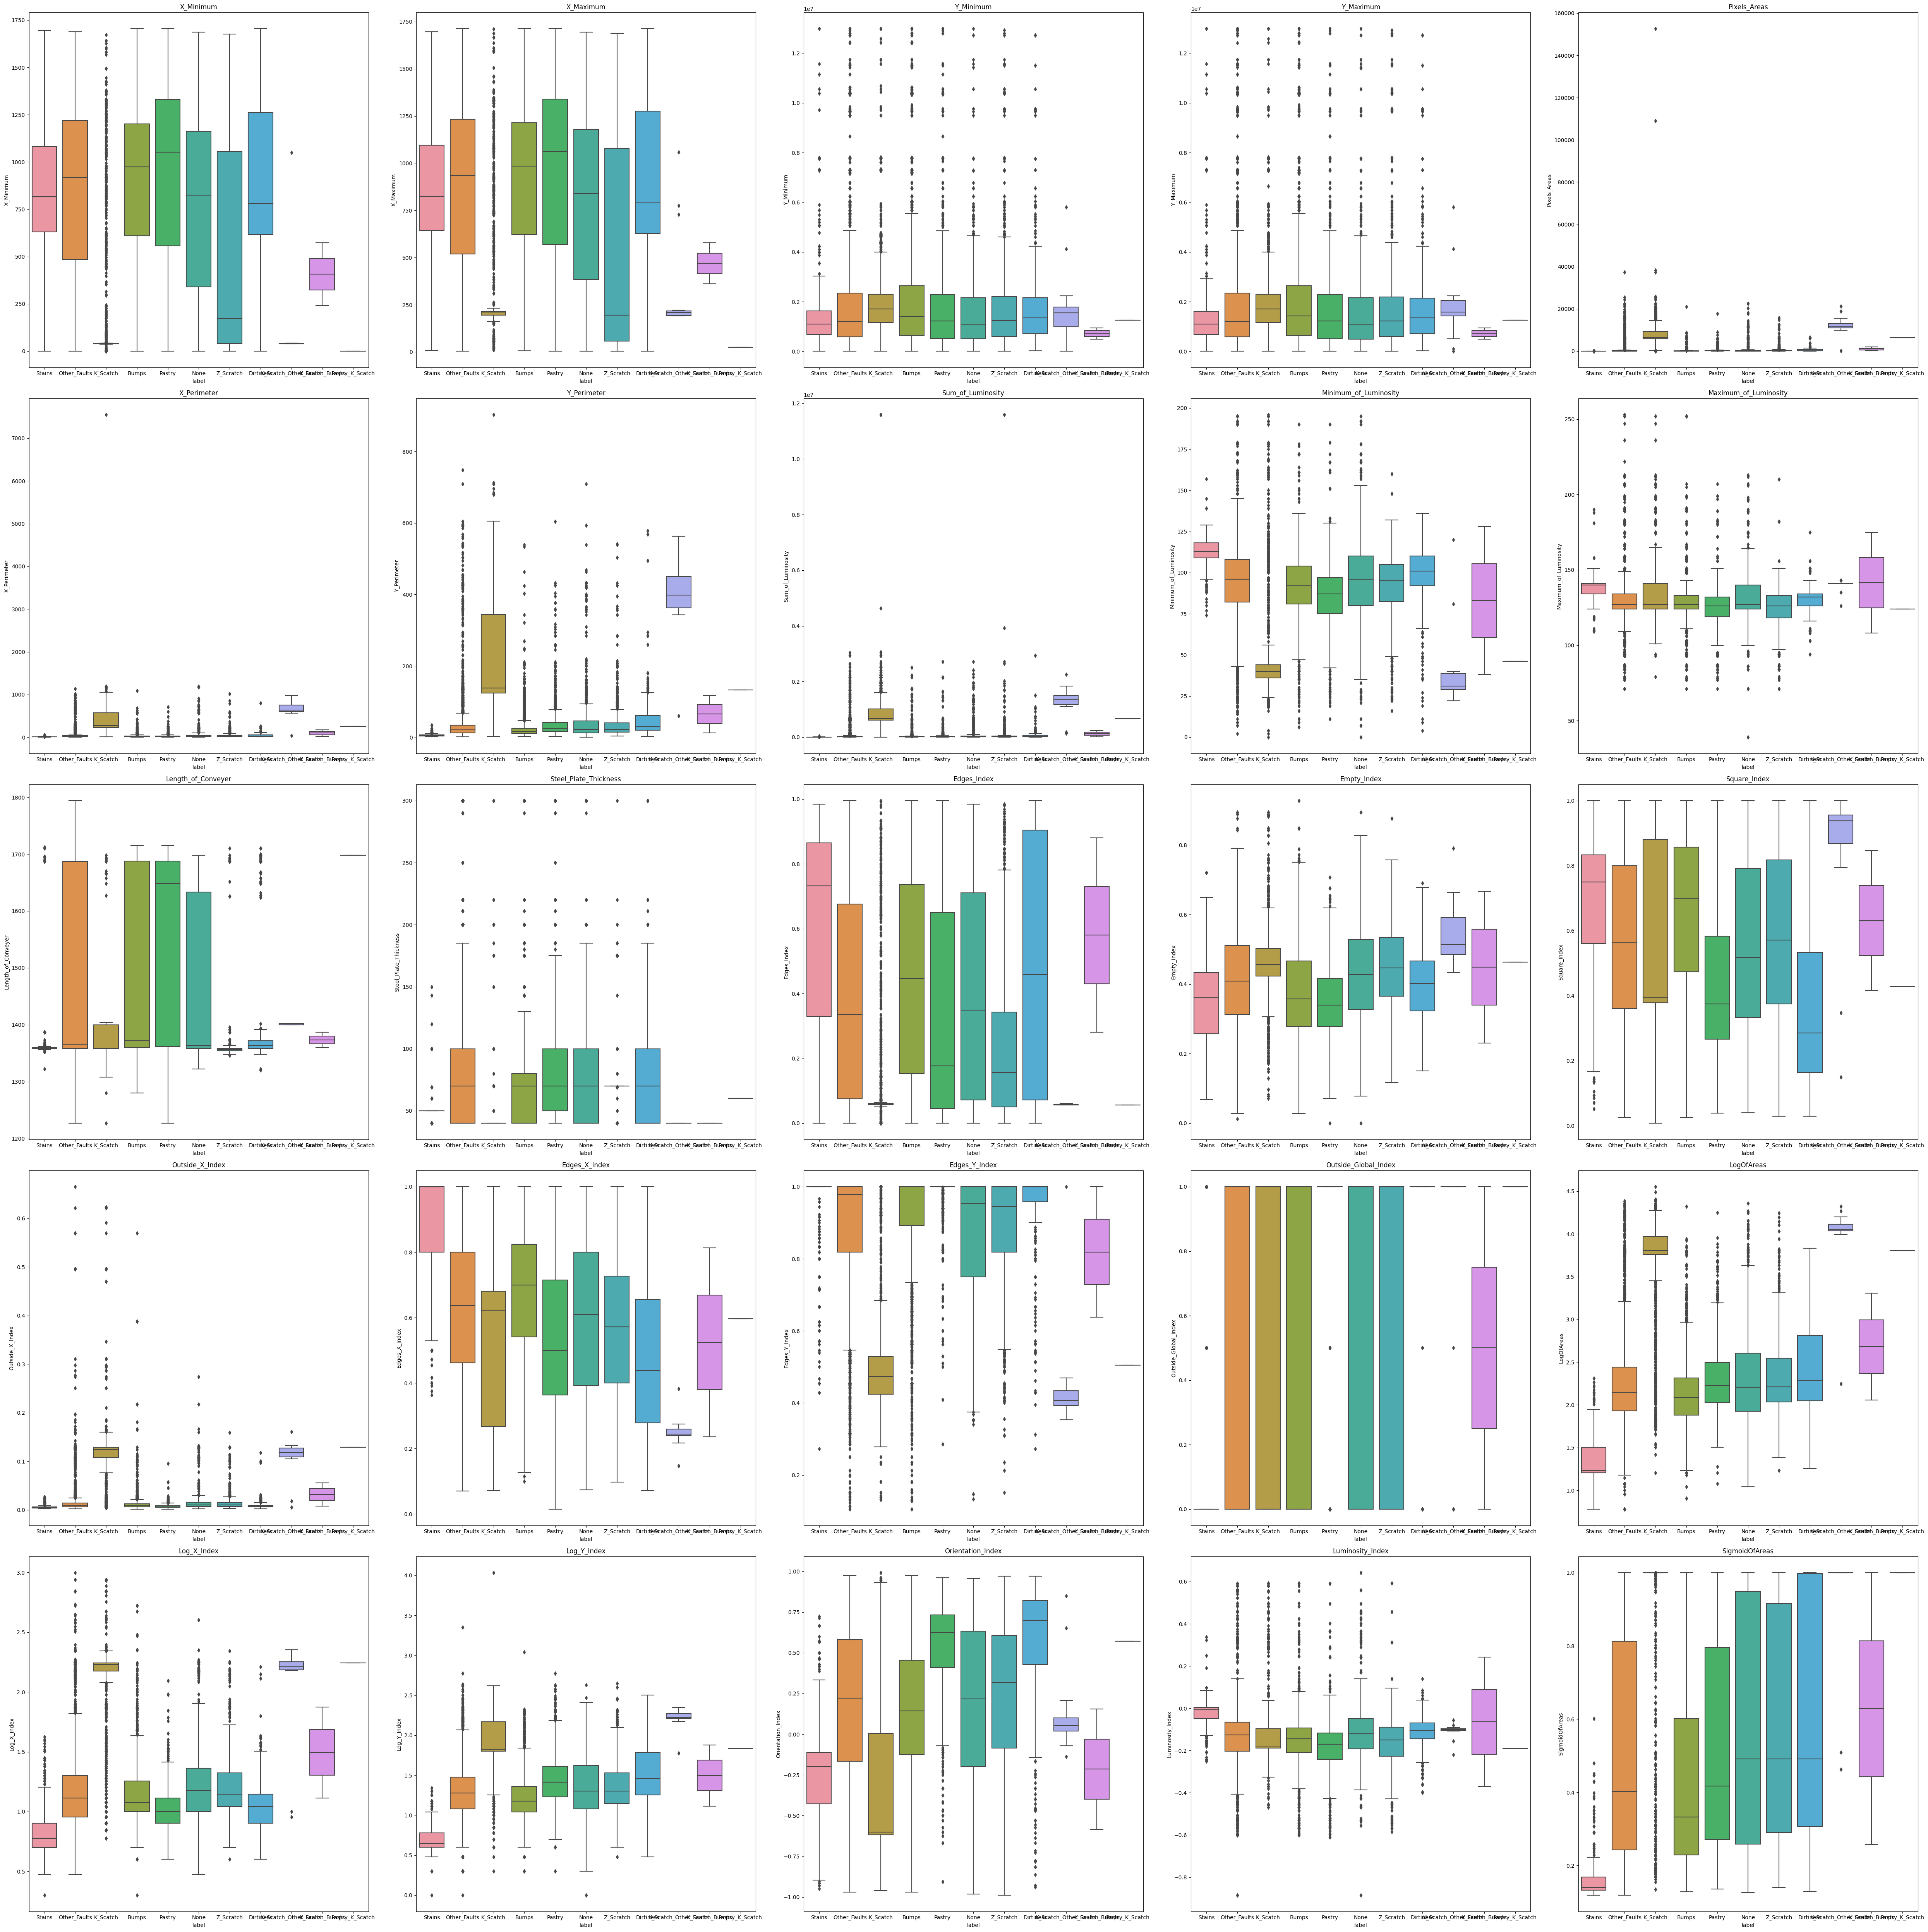

In [23]:
f, ax = plt.subplots(5,5, figsize=(50, 50))
ax = ax.flatten()

for index, cols in enumerate(numeric_cols):
    sns.boxplot(data = train, x = 'label', y = cols, ax=ax[index])
    ax[index].set_title(cols)
    
plt.tight_layout()
plt.show()

------------

**Aggregate Label Variables**

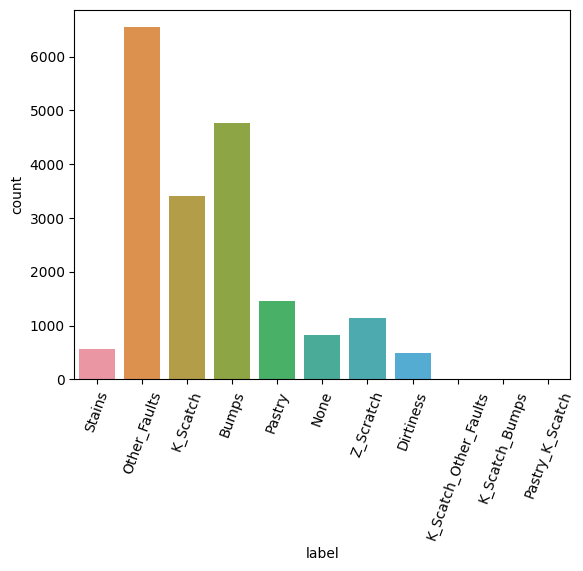

In [24]:
sns.countplot(data = target_data, x = 'label')
plt.xticks(rotation=70)
plt.show()

-----------

**Correlation Heatmap**

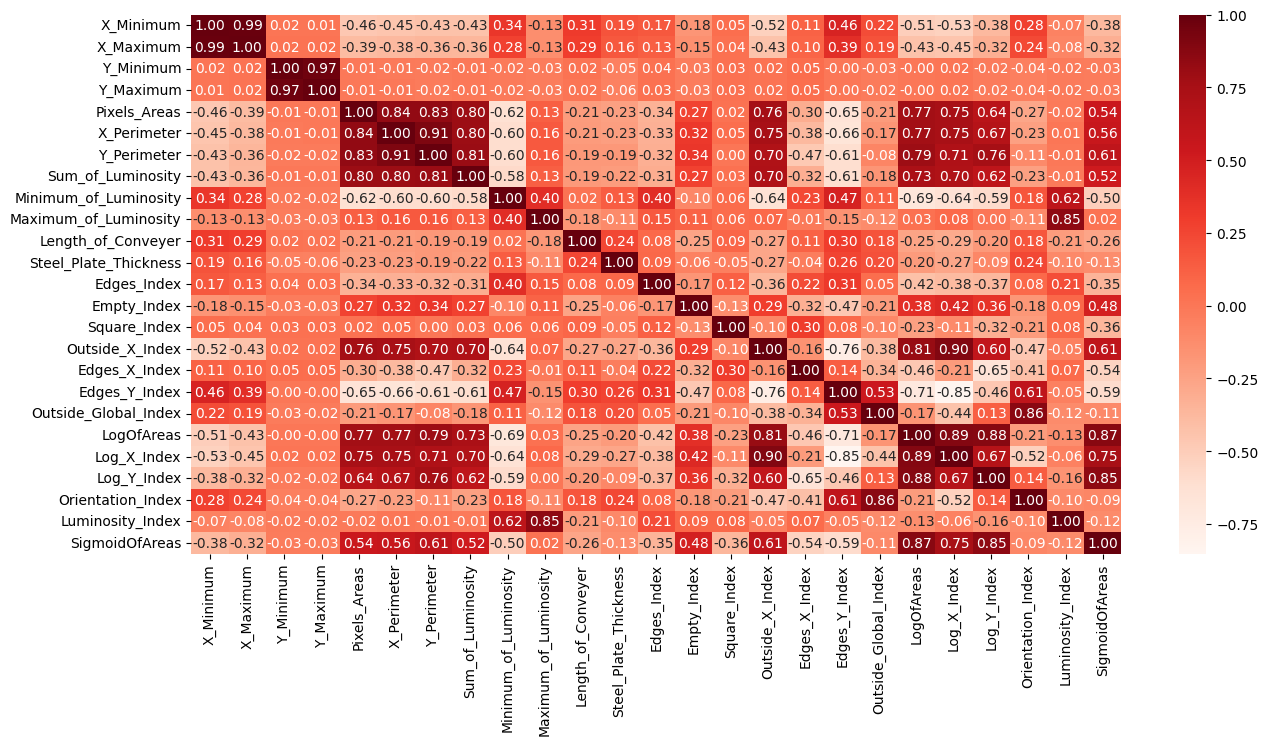

In [25]:
plt.figure(figsize=(15,7))
sns.heatmap(train[numeric_cols].corr(),annot=True, fmt = '.2f',cmap='Reds')
plt.show()

-----------------

# **4. Modeling**

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score

In [27]:
target = ["Pastry","Z_Scratch","K_Scatch","Stains","Dirtiness","Bumps","Other_Faults"]

In [28]:
X = train.drop(["Pastry","Z_Scratch","K_Scatch","Stains","Dirtiness","Bumps","Other_Faults","label"], axis=1) 
y = train[["Pastry","Z_Scratch","K_Scatch","Stains","Dirtiness","Bumps","Other_Faults"]]

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**RandomForest**

In [30]:
md_rf = RandomForestClassifier()

In [31]:
md_rf.fit(X_train, y_train)

RandomForestClassifier()

In [33]:
pred_rf = md_rf.predict(X_test)

In [34]:
print(f'roc_auc_score : {round(roc_auc_score(y_test,pred_rf),5)}')

roc_auc_score : 0.65317


--------------

**KNN**

In [36]:
md_knn = KNeighborsClassifier()

In [37]:
md_knn.fit(X_train, y_train)

KNeighborsClassifier()

In [38]:
pred_knn = md_knn.predict(X_test)

In [39]:
print(f'roc_auc_score : {round(roc_auc_score(y_test,pred_knn),5)}')

roc_auc_score : 0.57394


-------------

**RandomForest - ROC_AUC_SCORE : 0.67**


------------

In [40]:
sample = pd.read_csv("/kaggle/input/playground-series-s4e3/sample_submission.csv")

In [42]:
submission = pd.DataFrame(pred_rf, columns=[target])

In [43]:
submission['id'] = sample['id']

In [44]:
cols = ['id','Pastry','Z_Scratch','K_Scatch','Stains','Dirtiness','Bumps','Other_Faults']
submission = submission[cols]

In [49]:
submission.head()

,id,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,19219,0,0,0,0,0,0,1
1,19220,0,0,1,0,0,0,0
2,19221,0,0,0,0,0,0,1
3,19222,0,0,0,0,0,0,0
4,19223,0,0,0,0,0,0,0


In [50]:
submission.to_csv("submission.csv", index=False)

**If you have any advice on ROC_AUC_SCORE rising, please leave it in the comments.**

**Thankyou.**
